In [22]:
import gc
import os
import h5py
import quimb as qu
import quimb.tensor as qtn
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import *
import matplotlib.pyplot as plt
from Haldane_anis_supervise_class import *
import pickle

In [ ]:
L = 7 
ls = 10 # even
bond = 30 # resonable amount
path  = f"/home/mehran/4th_project-Haldan_anisotropic/Supervised_learning/dataset_L={L}_bond={bond}_ls={ls}"
os.makedirs(path, exist_ok=True)

In [4]:
dataset = Haldan_anis(L = L, ls = ls).generate_train_set() 
#ds[0] = DMRG_state, ds[1] = DMRG_target, ds[2] = project_state, ds[3] = project_target, ds[4] = points

file_path = os.path.join(path, 'dataset.pkl')
with open(file_path, "wb") as f:
    pickle.dump(dataset, f)
gc.collect(2)

/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  warnings.warn(
/home/mehran/TN_QML/lib/python3.12/site-packages/quimb/core.py:45: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 4 vs 1.
  

26

In [13]:
def gram_matrix_DMRG_11():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset[2].shape[0]
    gs = loaded_dataset[2]
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(0,int(d/2)):
        for j in range(0,int(d/2)):
            afinity_train[i,j] = np.abs(gs[i].H @ gs[j])**2

    return afinity_train

file_path_11= os.path.join(path, "kernel_test_Haldane_11.hdf5")
with h5py.File(file_path_11, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_11", data = gram_matrix_DMRG_11())
    
gc.collect(2)

2721

In [15]:
def gram_matrix_DMRG_12():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset[2].shape[0]
    gs = loaded_dataset[2]
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(0,int(d/2)):
        for j in range(int(d/2),d):
            afinity_train[i,j-int(d/2)] = np.abs(gs[i].H @ gs[j])**2

    return afinity_train

file_path_12 = os.path.join(path, "kernel_test_Haldane_12.hdf5")
with h5py.File(file_path_12, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_12", data = gram_matrix_DMRG_12())
    
gc.collect(2)

817

In [16]:
def gram_matrix_DMRG_21():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset[2].shape[0]
    gs = loaded_dataset[2]
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(int(d/2),d):
        for j in range(0,int(d/2)):
            afinity_train[i-int(d/2),j] = np.abs(gs[i].H @ gs[j])**2

    return afinity_train

file_path_21 = os.path.join(path, "kernel_test_Haldane_21.hdf5")
with h5py.File(file_path_21, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_21", data = gram_matrix_DMRG_21())
    
gc.collect(2)

0

In [17]:
def gram_matrix_DMRG_22():

    with open(file_path, "rb") as f:
        loaded_dataset = pickle.load(f)

    d = loaded_dataset[2].shape[0]
    gs = loaded_dataset[2]
    afinity_train = np.zeros((int(d/2),int(d/2)))
    for i in range(int(d/2),d):
        for j in range(int(d/2),d):
            afinity_train[i-int(d/2),j-int(d/2)] = np.abs(gs[i].H @ gs[j])**2
    return afinity_train

file_path_22 = os.path.join(path, "kernel_test_Haldane_22.hdf5")
with h5py.File(file_path_22, "w") as f:
    f.create_dataset(" gram_matrix_DMRG_22", data = gram_matrix_DMRG_22())
    
gc.collect(2)

0

In [18]:
res11 = h5py.File(file_path_11 ,'r')[' gram_matrix_DMRG_11'][:]
res12 = h5py.File(file_path_12 ,'r')[' gram_matrix_DMRG_12'][:]
res21 = h5py.File(file_path_21 ,'r')[' gram_matrix_DMRG_21'][:]
res22 = h5py.File(file_path_22 ,'r')[' gram_matrix_DMRG_22'][:]
kernel = np.block([[res11, res12],
                  [res21, res22]])

In [ ]:
test_set = Haldan_anis(L = L, ls = ls).generate_test_set()#ts[0]=DMRG_state, ts[1]=points
file_path = os.path.join(path, 'testset.pkl')
with open(file_path, "wb") as f:
    pickle.dump(test_set, f)
gc.collect(2)

In [ ]:
def gram_test():
    Xte = test_set[0]
    d1 = len(Xte)
    Xtr = dataet[2]
    d2 = len(Xtr)
    gram_matrix_test = np.zeros((d1,d2))
    for i in range(d1):
        for j in range(d2):
            gram_matrix_test[i,j] = np.abs((Xte[i].H @ Xtr[j]))**2/ (np.abs((Xte[i].H @ Xte[i]))*np.abs((Xtr[j].H @ Xtr[j])))
    return gram_matrix_test

gtest = gram_test()

with h5py.File("gram_test.hdf5", "w") as f:
    f.create_dataset("gram_test", data = gram_test())

gc.collect(2)

0

In [19]:
clf = svm.SVC(kernel='precomputed')
y = dataset[3]
clf.fit(kernel, y) 
y_pred = clf.predict(kernel)

TypeError: Invalid shape (328,) for image data

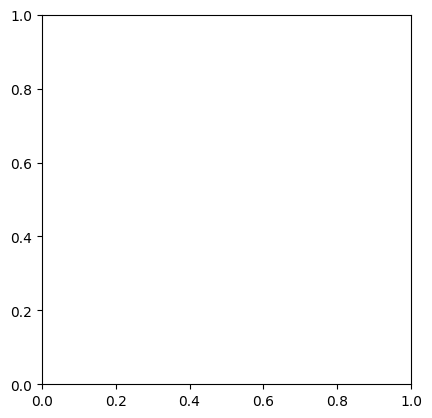

In [20]:
plt.imshow(y_pred)